In [1]:
# https://pypi.org/project/pyportfolioopt/
# https://github.com/robertmartin8/PyPortfolioOpt
# https://github.com/jmoz/trafalgar

In [2]:
# !pip install trafalgar.py

In [ ]:
# pip install PyPortfolioOpt

In [2]:
import pandas as pd
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt import CLA
from pypfopt import hierarchical_portfolio

In [ ]:
import trafalgar as tf
import math # needed for the trafalgar library

In [ ]:
EfficientFrontier()

In [ ]:
expected_returns.capm_return()

In [ ]:
risk_models.semicovariance()

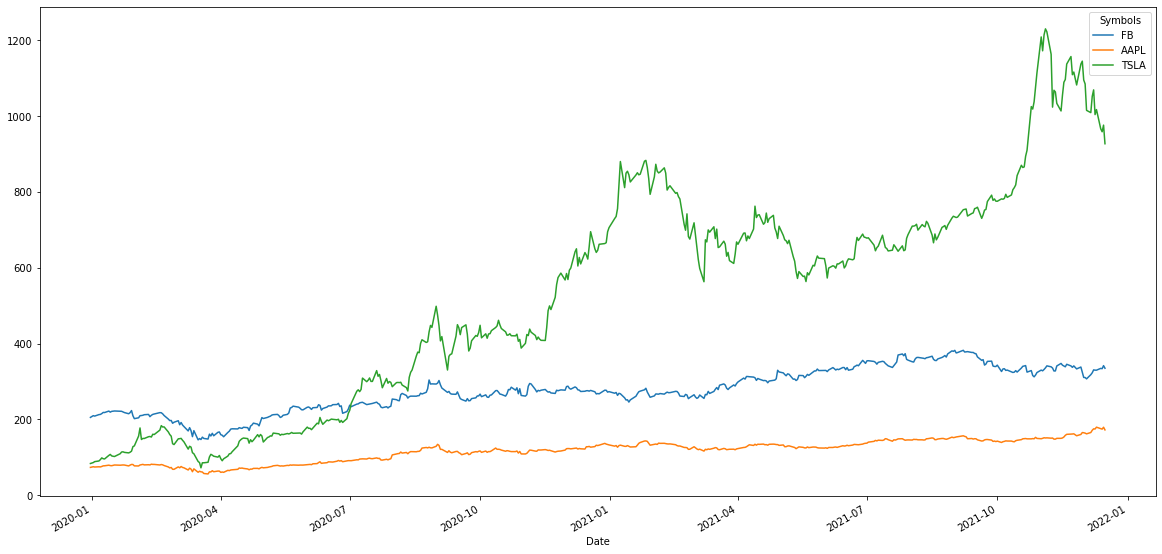

In [5]:
tf.graph_close(["FB", "AAPL", "TSLA"], "2020-01-01", "2022-01-01")

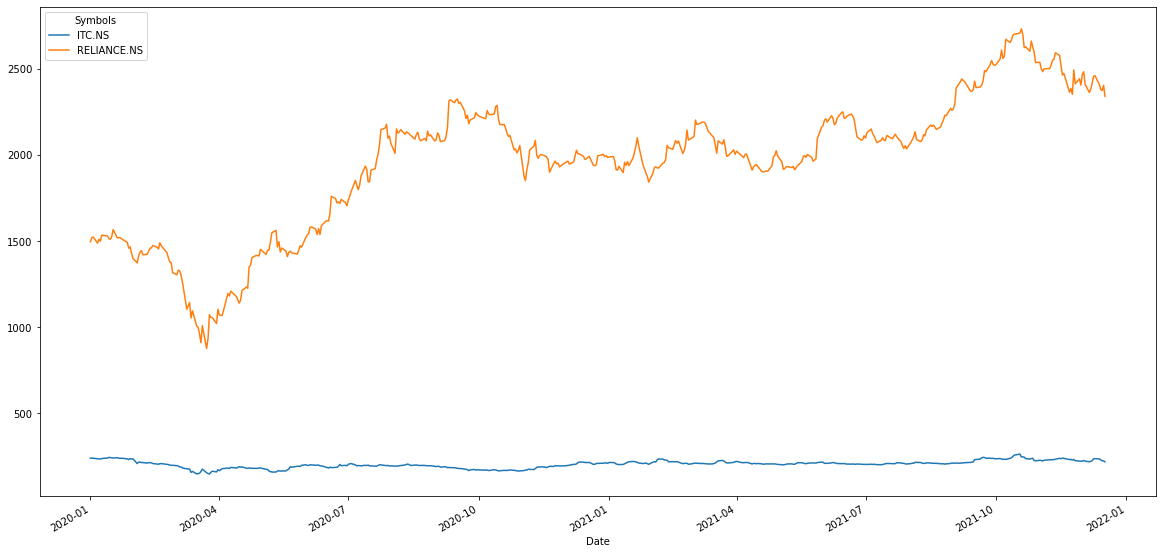

In [28]:
import trafalgar as tf
tf.graph_close(stock=["ITC.NS", "RELIANCE.NS"], start_date = "2020-01-01", end_date = "2022-01-01")

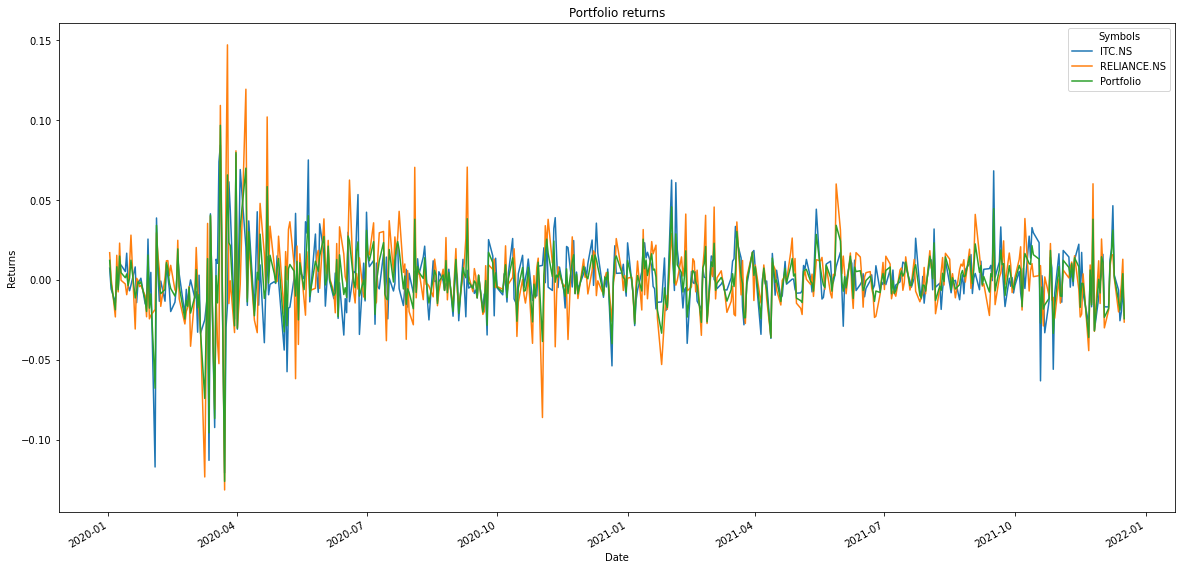

In [9]:
tf.graph_returns(["ITC.NS", "RELIANCE.NS"], (0.5,0.5),"2020-01-01", "2022-01-01")

<Figure size 1440x720 with 0 Axes>

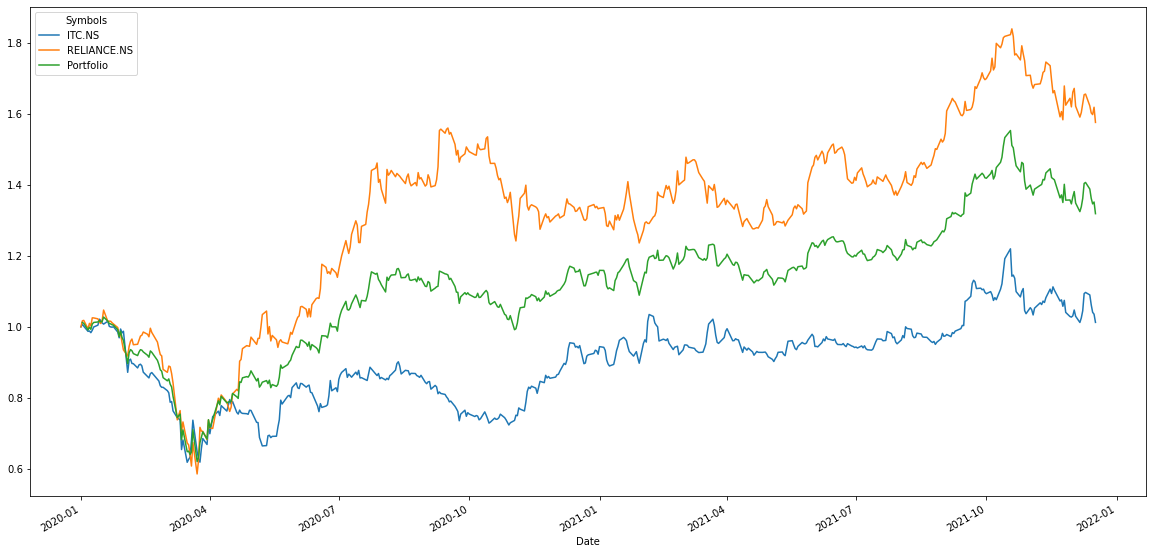

In [32]:
tf.graph_creturns(stock = ["ITC.NS", "RELIANCE.NS"], wts = (0.5,0.5),start_date = "2020-01-01", end_date = "2022-01-01",
                 x=20,y=10);

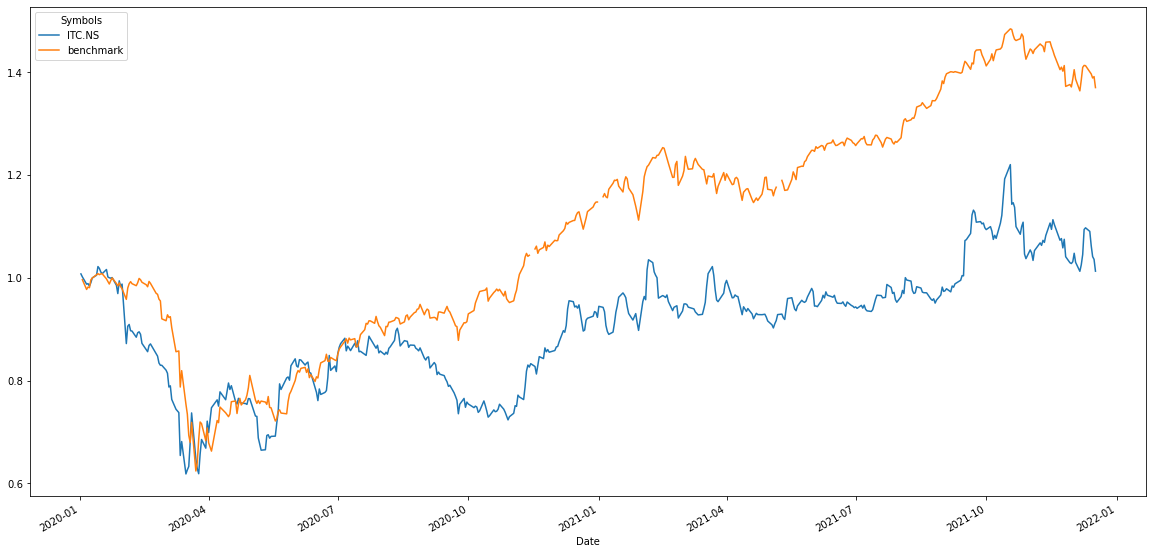

In [12]:
tf.graph_cbenchmark(['ITC.NS'],1,"^BSESN","2020-01-01", "2022-01-01")

In [18]:
tf.alpha(['AAPL'],1,"SPY","2020-01-01", "2022-01-01")

0.0009313409612231462

In [26]:
import math
tf.efficient_frontier(["AAPL", "FB", "TSLA", "BABA"], "2020-01-01", "2021-01-01", 10000)
# tf.efficient_frontier(["ITC.NS", "RELIANCE.NS"])

NameError: name 'math' is not defined

In [4]:
from pypfopt import plotting
from pypfopt import CLA
from pypfopt import hierarchical_portfolio

In [4]:
nifty = pd.read_csv("Nifty.csv")

In [5]:
nifty.Date = pd.to_datetime(nifty.Date,format="%d-%b-%y")
nifty.set_index('Date',inplace=True)
nifty.head(2)

,Adani Ports & Special Economic Zone Ltd.,Asian Paints Ltd.,Axis Bank Ltd.,Bajaj Auto Ltd.,Bajaj Finance Ltd.,Bajaj Finserv Ltd.,Bharat Petroleum Corpn. Ltd.,Bharti Airtel Ltd.,Bharti Infratel Ltd.,Britannia Industries Ltd.,...,Tata Consultancy Services Ltd.,Tata Motors Ltd.,Tata Steel Ltd.,Tech Mahindra Ltd.,Titan Company Ltd.,U P L Ltd.,Ultratech Cement Ltd.,Vedanta Ltd.,Wipro Ltd.,Zee Entertainment Enterprises Ltd.
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,399.65,1143.65,565.5,3289.25,1725.65,5171.85,508.6,484.71,369.95,2369.12,...,1322.8,424.45,711.11,503.10,852.45,503.83,4256.05,325.45,237.41,579.20
2018-01-02,397.40,1142.75,559.5,3294.75,1724.65,5101.10,499.8,474.29,378.80,2328.03,...,1315.6,439.30,718.10,513.95,845.15,515.63,4252.30,327.75,239.02,578.15


In [6]:
nifty_ret = nifty.pct_change().dropna()
nifty_ret.head(2)

,Adani Ports & Special Economic Zone Ltd.,Asian Paints Ltd.,Axis Bank Ltd.,Bajaj Auto Ltd.,Bajaj Finance Ltd.,Bajaj Finserv Ltd.,Bharat Petroleum Corpn. Ltd.,Bharti Airtel Ltd.,Bharti Infratel Ltd.,Britannia Industries Ltd.,...,Tata Consultancy Services Ltd.,Tata Motors Ltd.,Tata Steel Ltd.,Tech Mahindra Ltd.,Titan Company Ltd.,U P L Ltd.,Ultratech Cement Ltd.,Vedanta Ltd.,Wipro Ltd.,Zee Entertainment Enterprises Ltd.
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,-0.005630,-0.000787,-0.010610,0.001672,-0.000579,-0.013680,-0.017302,-0.021497,0.023922,-0.017344,...,-0.005443,0.034986,0.009830,0.021566,-0.008564,0.023421,-0.000881,0.007067,0.006782,-0.001813
2018-01-03,0.025793,-0.000744,0.001698,-0.016299,-0.005421,-0.000323,-0.009804,0.003184,-0.000396,0.005344,...,0.002835,-0.012292,0.007743,0.010701,0.013193,0.003045,0.011676,0.014493,-0.027445,0.002767


In [7]:
ret = expected_returns.mean_historical_return(nifty)
risk = risk_models.sample_cov(nifty)

In [10]:
nifty_opt = EfficientFrontier(ret, risk)
raw_weights = nifty_opt.max_sharpe()
nifty_opt.portfolio_performance(verbose=True)

Expected annual return: 35.3%
Annual volatility: 23.3%
Sharpe Ratio: 1.43


(0.3531999236085728, 0.23324765587118246, 1.4285242111611691)

In [11]:
nifty_opt_short = EfficientFrontier(ret, risk,weight_bounds=(-1,1))
raw_weights = nifty_opt_short.max_sharpe()
nifty_opt_short.portfolio_performance(verbose=True)

Expected annual return: 205.1%
Annual volatility: 60.6%
Sharpe Ratio: 3.35


(2.050689157698579, 0.606463335830411, 3.3484120765817122)

In [9]:
# # Read in price data
# df = pd.read_csv("stock_prices.csv", parse_dates=True, index_col="date")

# # Calculate expected returns and sample covariance
# mu = expected_returns.mean_historical_return(df)
# S = risk_models.sample_cov(df)

# # Optimise for maximal Sharpe ratio
# ef = EfficientFrontier(mu, S)
# raw_weights = ef.max_sharpe()
# cleaned_weights = ef.clean_weights()
# ef.save_weights_to_file("weights.csv")  # saves to file
# print(cleaned_weights)
# ef.portfolio_performance(verbose=True)

In [8]:
cla = CLA(ret,risk)

In [18]:
port = cla.efficient_frontier(200)
# return list, std list, weight list

In [21]:
len(port[2])

161

In [15]:
import seaborn as sns

<AxesSubplot:>

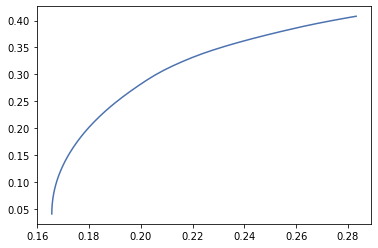

In [19]:
sns.lineplot(x = port[1],y=port[0])

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

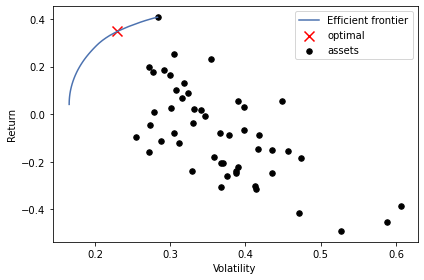

In [13]:
plotting.plot_efficient_frontier(cla)

In [38]:
# Plotting.plot_weights(cleaned_weights)

In [14]:
# from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices


# latest_prices = get_latest_prices(df)

# da = DiscreteAllocation(raw_weights, latest_prices, total_portfolio_value=10000)
# allocation, leftover = da.lp_portfolio()
# print("Discrete allocation:", allocation)
# print("Funds remaining: ${:.2f}".format(leftover))

NameError: name 'df' is not defined

In [ ]:
# What's new
# As of v1.2.0:

# Docker support
# Idzorek's method for specifying Black-Litterman views using percentage confidences.
# Industry constraints: limit your sector exposure.
# Multiple additions and improvements to risk_models:
# Introduced a new API, in which the function risk_models.risk_matrix(method="...") allows all the different risk models to be called. This should make testing easier.
# All methods now accept returns data instead of prices, if you set the flag returns_data=True.
# Automatically fix non-positive semidefinite covariance matrices!
# Additions and improvements to expected_returns:
# Introduced a new API, in which the function expected_returns.return_model(method="...") allows all the different return models to be called. This should make testing easier.
# Added option to 'properly' compound returns.
# James-Stein shrinkage estimator
# CAPM return model.
# from pypfopt import Plotting: moved all plotting functionality into a new class and added new plots. All other plotting functions (scattered in different classes) have been retained, but are now deprecated.

In [15]:
# Long/short: by default all of the mean-variance optimisation methods in PyPortfolioOpt are long-only, 
# but they can be initialised to allow for short positions by changing the weight bounds:
# ef = EfficientFrontier(mu, S, weight_bounds=(-1, 1))
# raw_weights = ef.max_sharpe()
# cleaned_weights = ef.clean_weights()

# print(cleaned_weights)
# ef.portfolio_performance(verbose=True)

NameError: name 'mu' is not defined

In [17]:
from pypfopt import objective_functions

In [13]:
# One issue with mean-variance optimisation is that it leads to many zero-weights. While these are "optimal" 
# in-sample, there is a large body of research showing that this characteristic leads mean-variance portfolios 
# to underperform out-of-sample. To that end, I have introduced an objective function that can reduce the number of
# negligible weights for any of the objective functions. Essentially, it adds a penalty (parameterised by gamma) on 
# small weights, with a term that looks just like L2 regularisation in machine learning. It may be necessary to try 
# several gamma values to achieve the desired number of non-negligible weights. For the test portfolio of 20 securities, 
# gamma ~ 1 is sufficient
# ef = EfficientFrontier(mu, S)

# ef.add_objective(objective_functions.L2_reg, gamma=1)


In [ ]:
# Black-Litterman allocation
# As of v0.5.0, we now support Black-Litterman asset allocation, which allows you to combine a prior estimate of 
# returns (e.g the market-implied returns) with your own views to form a posterior estimate. This results in much 
# better estimates of expected returns than just using the mean historical return. Check out the docs for a discussion 
# of the theory, as well as advice on formatting inputs.


In [16]:
from pypfopt import BlackLittermanModel

In [18]:
risk = risk_models.sample_cov(nifty)
my_views = {'Asian Paints Ltd.': 0.20, 'I T C Ltd.': -0.30, 'Shree Cement Ltd.': 0.3, 
            'Reliance Industries Ltd.': 0.4}
bl = BlackLittermanModel(risk, pi="equal", absolute_views=my_views)
rets = bl.bl_returns()

ef = EfficientFrontier(rets, risk)
ef.max_sharpe()

OrderedDict([('Adani Ports & Special Economic Zone Ltd.', 0.0),
             ('Asian Paints Ltd.', 0.1077594717696556),
             ('Axis Bank Ltd.', 0.0),
             ('Bajaj Auto Ltd.', 0.0),
             ('Bajaj Finance Ltd.', 0.0),
             ('Bajaj Finserv Ltd.', 0.0),
             ('Bharat Petroleum Corpn. Ltd.', 0.0),
             ('Bharti Airtel Ltd.', 0.0),
             ('Bharti Infratel Ltd.', 0.0),
             ('Britannia Industries Ltd.', 0.0),
             ('Cipla Ltd.', 0.0),
             ('Coal India Ltd.', 0.0),
             ("Dr. Reddy'S Laboratories Ltd.", 0.0),
             ('Eicher Motors Ltd.', 0.0),
             ('G A I L (India) Ltd.', 0.0),
             ('Grasim Industries Ltd.', 0.0),
             ('H C L Technologies Ltd.', 0.0),
             ('H D F C Bank Ltd.', 0.0),
             ('Hero Motocorp Ltd.', 0.0),
             ('Hindalco Industries Ltd.', 0.0),
             ('Hindustan Unilever Ltd.', 0.0),
             ('Housing Development Finance Corpn.

In [19]:
# S = risk_models.sample_cov(df)
# viewdict = {"AAPL": 0.20, "BBY": -0.30, "BAC": 0, "SBUX": -0.2, "T": 0.131321}
# bl = BlackLittermanModel(S, pi="equal", absolute_views=viewdict, omega="default")
# rets = bl.bl_returns()

# ef = EfficientFrontier(rets, S)
# ef.max_sharpe()

NameError: name 'df' is not defined

In [ ]:
# Other optimisers
# The features above mostly pertain to solving efficient frontier optimisation problems via quadratic programming 
# (though this is taken care of by cvxpy). However, we offer different optimisers as well:

# Hierarchical Risk Parity, using clustering algorithms to choose uncorrelated assets
# Markowitz's critical line algorithm (CLA)

In [ ]:
# Expected returns
# Mean historical returns:
# the simplest and most common approach, which states that the expected return of each asset is equal to the mean of its historical returns.
# easily interpretable and very intuitive
# Exponentially weighted mean historical returns:
# similar to mean historical returns, except it gives exponentially more weight to recent prices
# it is likely the case that an asset's most recent returns hold more weight than returns from 10 years ago when it comes to estimating future returns.
# James-Stein shrinkage:
# a slightly more robust estimate of future returns
# by shrinking mean returns to the grand average, we can reduce loss.
# Capital Asset Pricing Model (CAPM):
# a simple model to predict returns based on the beta to the market
# this is used all over finance!

In [ ]:
# Risk models (covariance)
# The covariance matrix encodes not just the volatility of an asset, but also how it correlated to other assets. This is important because in order to reap the benefits of diversification (and thus increase return per unit risk), the assets in the portfolio should be as uncorrelated as possible.

# Sample covariance matrix:
# an unbiased estimate of the covariance matrix
# relatively easy to compute
# the de facto standard for many years
# however, it has a high estimation error, which is particularly dangerous in mean-variance optimisation because the optimiser is likely to give excess weight to these erroneous estimates.
# Semicovariance: a measure of risk that focuses on downside variation.
# Exponential covariance: an improvement over sample covariance that gives more weight to recent data
# Covariance shrinkage: techniques that involve combining the sample covariance matrix with a structured estimator, to reduce the effect of erroneous weights. PyPortfolioOpt provides wrappers around the efficient vectorised implementations provided by sklearn.covariance.
# manual shrinkage
# Ledoit Wolf shrinkage, which chooses an optimal shrinkage parameter. We offer three shrinkage targets: constant_variance, single_factor, and constant_correlation.
# Oracle Approximating Shrinkage
# Minimum Covariance Determinant:
# a robust estimate of the covariance
# implemented in sklearn.covariance

In [ ]:
# PyPortfolioOpt provides a test dataset of daily returns for 20 tickers:

# ['GOOG', 'AAPL', 'FB', 'BABA', 'AMZN', 'GE', 'AMD', 'WMT', 'BAC', 'GM',
# 'T', 'UAA', 'SHLD', 'XOM', 'RRC', 'BBY', 'MA', 'PFE', 'JPM', 'SBUX']

In [27]:
nifty_hc = hierarchical_portfolio.HRPOpt(nifty)

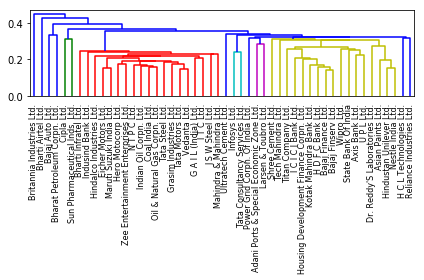

In [28]:
nifty_hc.plot_dendrogram();

In [30]:
nifty_hc.clusters

array([[ 4.        ,  5.        ,  0.14338995,  2.        ],
       [41.        , 47.        ,  0.15017704,  2.        ],
       [20.        , 33.        ,  0.15105385,  2.        ],
       [13.        , 31.        ,  0.15471863,  2.        ],
       [17.        , 50.        ,  0.15919189,  3.        ],
       [11.        , 34.        ,  0.16074924,  2.        ],
       [24.        , 55.        ,  0.16267641,  3.        ],
       [28.        , 54.        ,  0.16846781,  4.        ],
       [32.        , 56.        ,  0.16853451,  4.        ],
       [15.        , 51.        ,  0.17427493,  3.        ],
       [18.        , 49.        ,  0.17650893,  2.        ],
       [42.        , 59.        ,  0.18763779,  4.        ],
       [58.        , 61.        ,  0.18989046,  8.        ],
       [60.        , 62.        ,  0.19350114, 10.        ],
       [ 1.        , 52.        ,  0.19891015,  3.        ],
       [21.        , 57.        ,  0.20361929,  5.        ],
       [53.        , 63.

In [40]:
print(ef.portfolio_performance(verbose=True))

Expected annual return: 509056.3%
Annual volatility: 9843.1%
Sharpe Ratio: 51.72
(5090.563039785902, 98.43069082936209, 51.71703050028154)
